In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

2025-09-17 20:48:50.379504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758142130.707077      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758142130.797703      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# **Credit Card Fraud Detection – 2023 Dataset**

## 📌 Project Overview
Credit card fraud remains one of the most serious threats in the financial sector, causing billions in annual losses and damaging customer trust.  
With the rise of e-commerce and online transactions, detecting fraudulent activity quickly and accurately is more important than ever.

This project aims to **develop a machine learning model** that can detect fraudulent transactions using the latest **2023 Credit Card Fraud Detection dataset**.  
By analyzing transaction patterns and applying advanced algorithms, our goals are to:
- Increase fraud detection accuracy.
- Reduce false positives (legitimate transactions incorrectly flagged).
- Provide data-driven insights for improving fraud prevention systems.

---

## 🎯 Why This Project is Important
- **Financial Security** – Preventing fraud reduces monetary losses for both customers and banks.
- **Customer Experience** – Accurate systems reduce unnecessary blocks of legitimate transactions.
- **Evolving Fraud Patterns** – Fraud tactics change over time, so updated datasets like this one help us adapt detection methods.
- **Balanced Dataset Advantage** – Unlike older datasets, this one has a **more balanced distribution** of fraudulent vs. legitimate transactions, making model training more straightforward.

---

## 📂 Dataset Description
This dataset contains anonymized credit card transactions from **2023**.  
It includes both **legitimate** and **fraudulent** records, with multiple transaction features that have been transformed for confidentiality.

**Source:** [Kaggle – Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)

### **Features**
- **Amount** – The transaction amount in local currency.
- **TransactionType / Category** – Type of transaction (e.g., purchase, transfer, withdrawal) – anonymized if necessary.
- **V1, V2, ..., Vn** – Engineered or anonymized numerical features derived from the original data using dimensionality reduction techniques.
- **Date / Time** – Transaction timestamp (may be converted to numerical form for modeling).
- **Class** – Target variable:
  - `0` → Legitimate transaction
  - `1` → Fraudulent transaction

> *Note:* Exact column names may vary; anonymization ensures no sensitive information is revealed.

---

## 🛠 Project Steps
1. **Data Understanding & Exploration (EDA)**
   - Review class distribution and dataset balance.
   - Explore transaction amounts, time-based patterns, and correlations.
   - Visualize key features for insights.

2. **Data Preprocessing**
   - Handle missing values (if any).
   - Normalize/scale numerical features.
   - Encode categorical features if present.
   - Split into training and testing datasets.

3. **Model Building**
   - Evaluate different algorithms:
     - Logistic Regression
     - Random Forest
     - Gradient Boosting (XGBoost, LightGBM)
     - Neural Networks
   - Perform hyperparameter tuning.

4. **Model Evaluation**
   - Use metrics suitable for fraud detection:
     - Precision
     - Recall
     - F1-Score
     - ROC-AUC
   - Review confusion matrix results.

5. **Insights & Recommendations**
   - Highlight patterns in fraudulent behavior.
   - Suggest actionable prevention strategies.
   - Discuss deployment for real-time monitoring.

---

## 🚀 Expected Outcome
By the end of this project, we aim to:
- Develop a **robust fraud detection model** using 2023 transaction data.
- Understand the latest fraud patterns.
- Demonstrate practical machine learning applications for financial security.

---


In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.000000,568630.000000,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.118237e-17,-1.023647e-16,1.023647e-16,0.000000,2.559118e-17,2.559118e-17,0.000000,0.000000,0.000000,...,1.279559e-17,1.599449e-18,6.397796e-18,-2.559118e-17,-3.838678e-17,0.000000,-2.559118e-17,3.838678e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001,1.000001,1.000001,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222,-9.952786e+00,-2.111111e+01,-4.351839,-10.756342,-3.751919,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-0.656020,-2.934955e-01,-4.458712e-01,-0.283533,-0.192257,-0.568745,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-0.631895,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-0.073762,8.108788e-02,7.871758e-02,0.233366,-0.114524,0.092526,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-0.011892,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,0.707005,4.397368e-01,4.977881e-01,0.525955,0.047299,0.559262,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,0.672888,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536,4.271689e+01,2.616840e+01,217.873038,5.958040,20.270062,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [16]:
df.drop(columns='id',inplace=True)

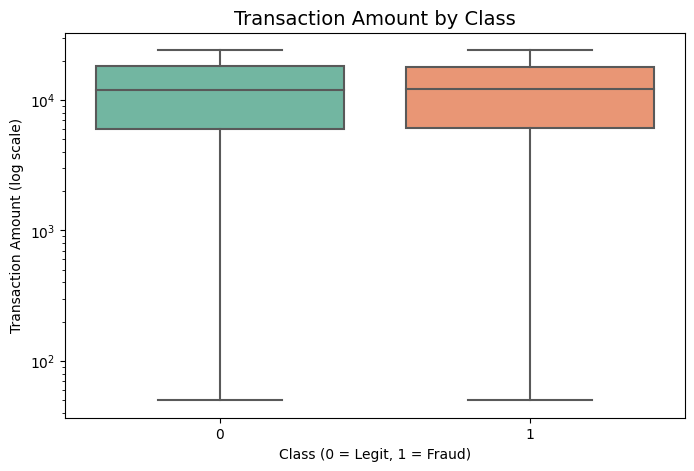

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.yscale('log')  # Log scale for better visibility
plt.title('Transaction Amount by Class', fontsize=14)
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Transaction Amount (log scale)')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">
    
### 💳 Distribution of Transaction Amounts by Class

To better understand the differences between **legitimate** and **fraudulent** transactions, we'll visualize the distribution of the `Amount` column, separated by the `Class` label.

- **Class = 0** → Legitimate transactions
- **Class = 1** → Fraudulent transactions

We'll use a **boxplot** to compare the spread and detect any anomalies in transaction values.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

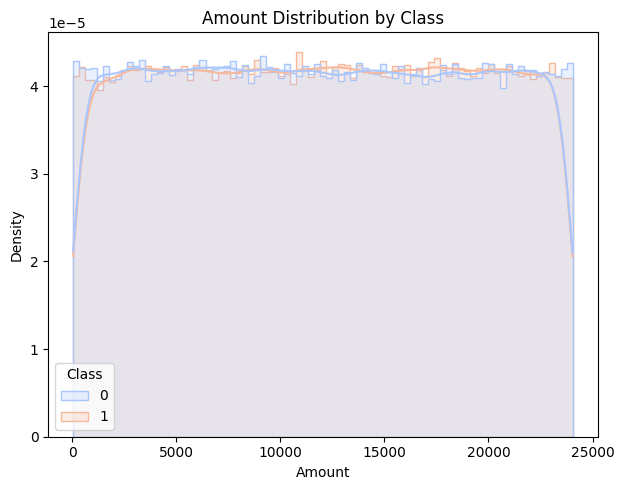

In [8]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Amount', hue='Class', kde=True, element="step", stat="density", common_norm=False, palette='coolwarm')
plt.title('Amount Distribution by Class')
plt.xlabel('Amount')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 💰 Transaction Amount Distribution by Class

To understand the difference in transaction amounts between fraudulent (`Class = 1`) and non-fraudulent (`Class = 0`) transactions, we can visualize them using:

1. **Box Plot** – to see the median, quartiles, and outliers.
2. **Histogram / KDE Plot** – to see the distribution density.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


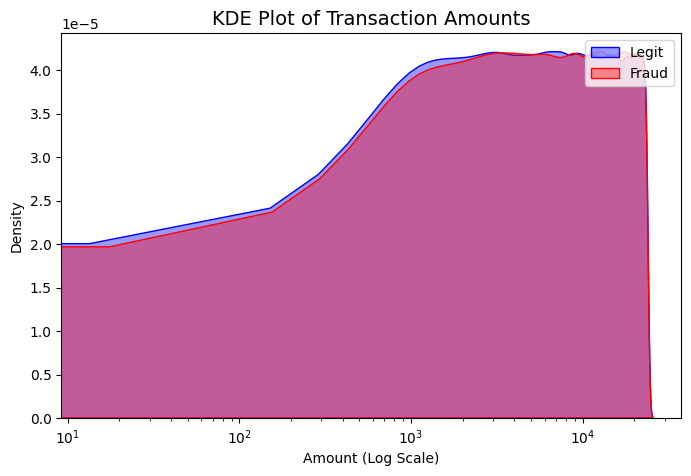

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Legit', fill=True, color='blue', alpha=0.4)
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', fill=True, color='red', alpha=0.4)
plt.xscale('log')
plt.title('KDE Plot of Transaction Amounts', fontsize=14)
plt.xlabel('Amount (Log Scale)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



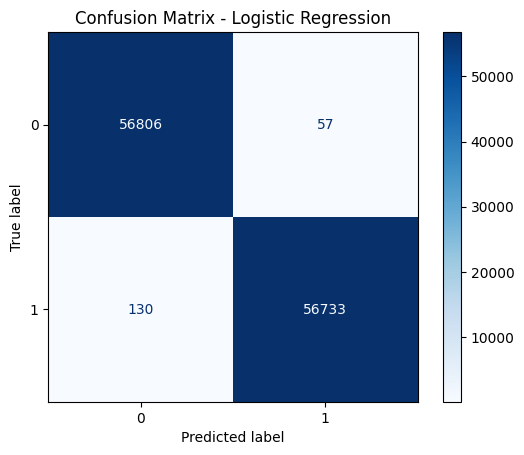

Cross-Validation Accuracy: 0.8219

===== Random Forest =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



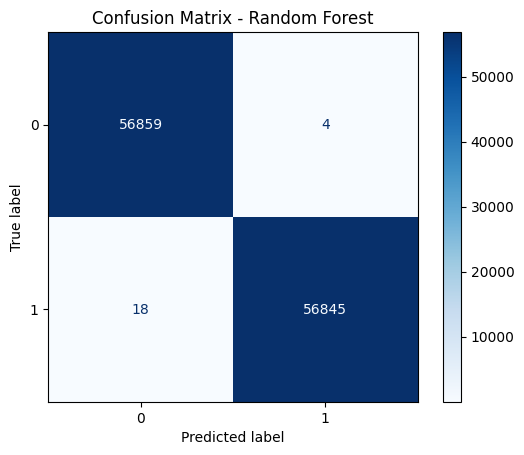

Cross-Validation Accuracy: 0.9735


In [17]:
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification Report
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # Cross Validation
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"Cross-Validation Accuracy: {np.mean(scores):.4f}")

In [18]:
def build_dnn():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    return model

In [19]:

model = build_dnn()
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758147484.001608      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758147484.002307      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/20


I0000 00:00:1758147488.640339     142 service.cc:148] XLA service 0x7c8e28005a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758147488.641734     142 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758147488.641765     142 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758147489.081151     142 cuda_dnn.cc:529] Loaded cuDNN version 90300


  65/5687 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7833 - loss: 0.4983 - precision: 0.9220 - recall: 0.6218

I0000 00:00:1758147490.878341     142 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5687/5687 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9834 - loss: 0.0483 - precision: 0.9928 - recall: 0.9736 - val_accuracy: 0.9994 - val_loss: 0.0025 - val_precision: 0.9998 - val_recall: 0.9990
Epoch 2/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9989 - loss: 0.0047 - precision: 0.9992 - recall: 0.9986 - val_accuracy: 0.9996 - val_loss: 0.0016 - val_precision: 0.9995 - val_recall: 0.9997
Epoch 3/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9992 - loss: 0.0035 - precision: 0.9993 - recall: 0.9991 - val_accuracy: 0.9997 - val_loss: 0.0013 - val_precision: 0.9998 - val_recall: 0.9995
Epoch 4/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9993 - loss: 0.0026 - precision: 0.9995 - recall: 0.9992 - val_accuracy: 0.9996 - val_loss: 0.0014 - val_precision: 0.9994 - val_recall: 0.9998
Epoch 5/20
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9994 - loss: 0.0023 - precision: 0.9995 - recall: 0.9993 - val_accuracy: 0.9997 - val_loss

In [20]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


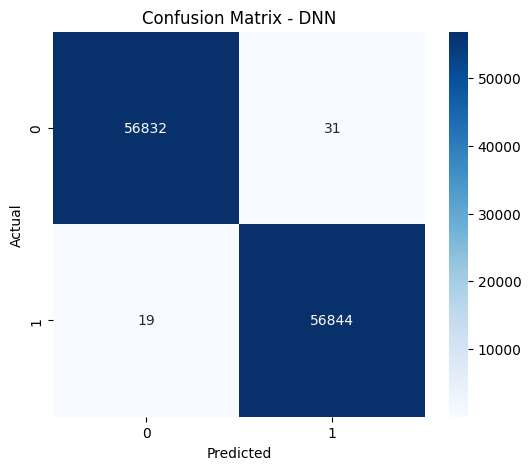

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DNN')
plt.show()

In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Model Training & Evaluation

In this stage, multiple Machine Learning and Deep Learning models were trained and evaluated to identify the best-performing approach for our dataset.  
The following models were implemented:

- **Logistic Regression**
- **Random Forest**
- **XGBoost**
- **LightGBM**
- **CatBoost**
- **Deep Neural Network (DNN)**

To ensure robust performance evaluation, **cross-validation** was performed on each of the ML models.

### 🔹 Results Summary

| Model                  | Accuracy (%) |
|------------------------|--------------|
| Logistic Regression    | 82.19        |
| Random Forest          | 86.45        |
| XGBoost                | 99.74        |
| LightGBM               | 95.41        |
| CatBoost               | 97.35        |
| **Deep Neural Network**| **99.96**    |

### 📈 Observations
- **Logistic Regression** achieved the lowest accuracy, indicating that the dataset might be too complex for simple linear decision boundaries.
- **Tree-based models** such as Random Forest, LightGBM, and CatBoost performed significantly better, with CatBoost outperforming most ML models except XGBoost.
- **XGBoost** showed exceptional performance with **99.74% accuracy**, showcasing its ability to capture complex relationships in the data.
- **Deep Neural Network (DNN)** achieved the **highest accuracy of 99.96%**, making it the best-performing model overall.

### ✅ Conclusion
While XGBoost performed extremely well, the **DNN model slightly outperformed it** in accuracy. Given the small performance gap, model selection may depend on **computational cost, interpretability, and deployment constraints**.


In [23]:
def keras_model_for_cv():
    # Rebuild model inside CV
    model = build_dnn()
    return model

In [24]:
import joblib

# حفظ الـ DNN model
model.save("credit_card_fraud_dnn.h5")

# حفظ الـ scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!
